```text
https://9ipr414kph.execute-api.us-east-1.amazonaws.com/dev/my_textract_v2
```

In [1]:
import base64
from typing import Union

def image_to_base64(file_path: str) -> Union[str, None]:
    """
    Reads an image file from the given file path and returns its content encoded in base64.

    Args:
        file_path (str): The path to the image file (e.g., png, jpg).

    Returns:
        Union[str, None]: The base64 encoded content of the image file, or None if the file could not be read.
    """
    try:
        # Open the image file in binary read mode
        with open(file_path, "rb") as image_file:
            # Read the entire content of the file
            image_content = image_file.read()

            # Encode the content to base64
            base64_encoded_image = base64.b64encode(image_content)

            # Decode the base64 bytes to a string
            base64_string = base64_encoded_image.decode('utf-8')

            return base64_string
    except Exception as e:
        # Handle exceptions (e.g., file not found, permission issues)
        print(f"An error occurred: {e}")
        return None

In [2]:
# Example usage
image_base64 = image_to_base64("/content/false-insurance-policy.jpeg")
print(image_base64)
print(type(image_base64))

/9j/4AAQSkZJRgABAQAAAQABAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNj

In [3]:
import requests
import json
from typing import Dict, Any

def post_request_and_parse_response(
    url: str, payload: Dict[str, Any]
) -> Dict[str, Any]:
    """
    Sends a POST request to the specified URL with the given payload,
    then parses the byte response to a dictionary.
    Args:
    url (str): The URL to which the POST request is sent.
    payload (Dict[str, Any]): The payload to send in the POST request.
    Returns:
    Dict[str, Any]: The parsed dictionary from the response.
    """
    # Set headers for the POST request
    headers = {"Content-Type": "application/json"}

    # Send the POST request and get the response
    response = requests.post(url, json=payload, headers=headers)

    # Extract the byte data from the response
    byte_data = response.content

    # Decode the byte data to a string
    decoded_string = byte_data.decode("utf-8")

    # Convert the JSON string to a dictionary
    dict_data = json.loads(decoded_string)

    return dict_data

In [4]:
url = "https://9ipr414kph.execute-api.us-east-1.amazonaws.com/dev/my_textract_v2"
payload = {"image": image_base64}
result_dict = post_request_and_parse_response(url, payload)

In [6]:
result_dict.keys()

dict_keys(['Blocks'])

In [9]:
len(result_dict['Blocks'])

269

In [11]:
result_dict['Blocks'][1]

{'BlockType': 'LINE',
 'Confidence': 99.67434692382812,
 'Text': 'COMBINED INSURANCE COMPANY OF IRELAND',
 'Geometry': {'BoundingBox': {'Width': 0.4229442775249481,
   'Height': 0.03675634041428566,
   'Left': 0.2871706187725067,
   'Top': 0.021821100264787674},
  'Polygon': [{'X': 0.2871706187725067, 'Y': 0.029376905411481857},
   {'X': 0.7099962830543518, 'Y': 0.021821100264787674},
   {'X': 0.7101148962974548, 'Y': 0.051168203353881836},
   {'X': 0.2872892916202545, 'Y': 0.058577440679073334}]},
 'Id': 'c9025a26-59b0-4267-9804-9f537653708c',
 'Relationships': [{'Type': 'CHILD',
   'Ids': ['6f5b2b0e-42d0-42ea-ae00-483afad33a91',
    '3f0ea2df-dc0f-4f2b-a572-fdd871305ce9',
    '90178609-e36e-4116-af8c-e5450f886f6d',
    'b27fe006-d0bb-46df-81ae-3bb02f31a353',
    'fad595a5-f882-46de-96ba-c0411172e54a']}]}

In [12]:
import json
from typing import Dict, Any
from PIL import Image, ImageDraw

def draw_bounding_boxes_for_textract(
    image: Image.Image, textract_data: Dict[str, Any]
) -> Image.Image:
    """
    Draws bounding boxes on an image based on Textract's JSON response.

    Args:
        image (Image.Image): The image on which to draw bounding boxes.
        textract_data (Dict[str, Any]): The Textract JSON response containing bounding boxes.

    Returns:
        Image.Image: A PIL Image object with bounding boxes drawn.
    """
    # Create a drawing object
    draw = ImageDraw.Draw(image)

    # Ensure 'Blocks' key exists in the response
    if "Blocks" not in textract_data:
        print("No 'Blocks' data found in Textract response.")
        return image

    # Iterate through blocks to find "LINE" items
    for item in textract_data["Blocks"]:
        if item.get("BlockType") == "LINE":  # Only process "LINE" types
            bbox = item["Geometry"]["BoundingBox"]

            # Extract coordinates and dimensions
            left = bbox["Left"] * image.width
            top = bbox["Top"] * image.height
            right = (bbox["Left"] + bbox["Width"]) * image.width
            bottom = (bbox["Top"] + bbox["Height"]) * image.height

            # Draw bounding box
            draw.rectangle([left, top, right, bottom], outline="red", width=2)

            # Optionally, annotate the detected text
            text = item.get("Text", "")
            if text:
                draw.text((left, top - 10), text, fill="red")

    return image


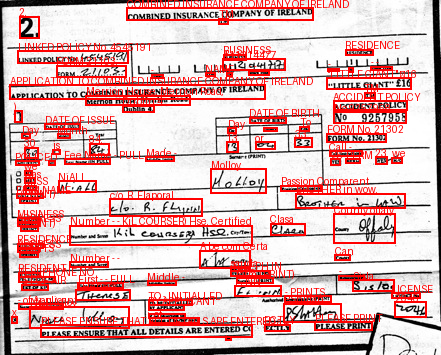

In [13]:
# Example usage
from PIL import Image
image = Image.open("/content/false-insurance-policy.jpeg")
json_data = result_dict  # Your Textract JSON data
image_with_boxes = draw_bounding_boxes_for_textract(image, json_data)
image_with_boxes  # To display the image in the Jupyter Notebook